이전 선형회귀에서 다항 회귀로 농어의 무게를 어느 정도 예측할 수 있지만, 여전히 훈련 세트보다 테스트 세트의 점수가 높은 것이 좀 찜찜하다.


이 문제를 해결하려면 제곱보다 더 고차항을 넣어야 하는데 얼마나 더 넣어야 하는 지 모르겠다. <br>
수동으로 일일이 넣기도 힘들다.

데이터의 종류가 길이뿐만이 아니라 두께 데이터도 있다면 어떨까? 

선형 회귀는 특성이 많을 수록 더 큰 효과를 낸다. 높이와 두께를 다항 회귀에 함께 적용시켜 보자.

### 다중 회귀

3-2까지는 하나의 특성을 사용하여 선형 회귀 모델을 훈련시켰다. 

여러 개의 특성을 사용한 선형 회귀를 ***다중 회귀*** 라고 한다.

2절에처럼 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선이다. <br>
2개의 특성을 사용하면 선형 회귀는 평면을 학습한다. 

그렇다면 3개 이상에서는 고차원을 그리거나 상상할 수 없다. 분명한 것은 <br>
선형 회귀를 단순한 직선이나 평면으로 생각하여 성능이 무조건 낮다고 오해해서는 안된다. 특성이 많은 고차원에서는 <br>
선형 회귀가 매우 복잡한 모델을 표현할 수 있다.

농어의 높이와 두께도 함께 사용해보겠다. 또한 이전 절에서처럼 3개의 특성을 각각 제곱하여 추가한다. <br>
거기다가 각 특성을 서로 곱해서 또다른 특성을 만들어 내겠다. 즉 농어 길이 X 농어 높이를 새로운 특성으로 만드는 것이다.

이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 ***특성 공학***이라 한다.

우리가 직접 특성을 곱할 수도 있지만 사이킷런에서 사용하는 편리한 도구를 사용해 보자.

일단 농어 데이터를 다시 불러오는 것에서 시작해 보자. <br>


### 농어 데이터 준비 <br>
http://bit.ly/perch_csv_data <br>
http://bit.ly/perch_data

농어의 데이터 특성이 3개로 늘어났기 때문에 데이터를 복사해 넣는 것도 복잡하다. <br>
인터넷에서 데이터를 바로 다운로드하여 사용할 수는 없을까? <br>
판다스를 사용하면 바로 가능하다.

판다스는 유명한 데이터 분석 라이브러리이다. 데이터프레임은 판다스의 핵심 데이터 구조이다. <br>
넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있지만 훨씬 더 많은 기능을 제공한다. <br>
또 데이터프레임은 넘파이 배열로 쉽게 바꿀 수 있다.

판다스 프레임을 만들기 위해 사용하는 팡리은 csv 파일이다. <br>
pandas의 read_csv 함수를 통해 데이터프레임을 만든 다음 to_numpy() 함수를 통해 넘파이 배열로 바꾼다.

In [7]:
import pandas as pd
df = pd.read_csv("http://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

타깃 데이터는 이전과 동일한 방법으로 준비한다.

In [8]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

그다음 perch_full과 perch_weight를 훈련 데이터와 테스트 데이터로 나눈다.

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

이 데이터를 활용해 새로운 특성을 만들겠다.

### 사이킷런의 변환기

사이킷런에서 특성을 만들거나 전처리하기 위해 제공하는 다양한 클래스를 <br>
***변환기***라고 한다.

변환기 클래스는 모두 fit(), transform() 메서드를 제공한다.

우리가 사용할 변환기는 PolynomialFeatures 클래스이다. <br>
이 클래스는 sklearn.preprocessing 패키지에 포함되어 있다.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

<**예제**>
2개의 특성 2와 3으로 이루어진 샘플 하나를 적용하겠다. 앞서 이야기한 것처럼 이 클래스의 객체르 만든 다음 <br>
fit(), transform() 메서드를 차례대로 호출하겠다.

In [11]:
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


fit() 메서드는 새롭게 만들 특성 조합을 찾고 <br>
transform() 메서드는 실제로 데이터를 변환한다.

변환기는 입력 데이터를 변환하는 데 타깃 데이터가 필요하지 않다. fit() 함수에 타깃 데이터 넣을 필요 없다.

PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다.

예시를 보면 <br>
2와 3을 각기 제곱한 4와 9가 추가되었고, 2와 3을 곱한 6이 추가되었다. 1은 왜 추가되었을까?

무게 = a * 길이 + b * 높이 + c * 두께 + d * 1

사실 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다. <br>
이렇게 놓고 보면 특성은 항상 ( 길이, 높이, 두께, 1 ) 이 된다.

하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 특성을 만들 필요가 없다. <br>
include_bias = False로 지정하여 다시 특성을 변환하겠다.

In [12]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


이제 이 방식으로 train_input에 적용해 보겠다. train_input을 변환한 데이터를 train_poly에 저장하고 <br>
이 배열의 크기를 확인해 보겠다.

In [13]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


PolynomialFeatures클래스는 9개의 특성이 어떻게 만들어졌는지 확인하는 아주 좋은 방법을 제공한다. <br>
다음처럼 get_feature_names() 메서드를 호출하면 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 알려 준다.

In [16]:
poly.get_feature_names()

C:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

테스트 세트도 변환해 보자.

In [19]:
test_poly = poly.transform(test_input)

x0^2 는 x0특성의 제곱을 의미하고, x1x2는 x1특성과 x2특성을 곱한 상태를 의미한다. <br>
이어서 변환된 특성을 사용하여 다중 회귀 모델을 훈련하겠다.

### 다중 회귀 모델 훈련하기

다중 회귀 모델을 훈련한다는 것은 선형 회귀 모델을 훈련한다는 것과 같다. <br>
단지 여러 개의 특성을 사용하여 선형 회귀 모델을 훈련한다는 것이다.

먼저 사이킷런의 LinearRegression 클래스를 import 하고 앞에서 만든 train_poly 를 사용해 모델을 훈련시켜 보겠다.

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


아주 높은 점수가 나왔다. 농어의 길이뿐만 아니라 높이와 두께 모두 사용했고  <br>
각 특성을 제곲하거나 서로 곱해서 다항 특성을 더 추가했다.

특성이 늘어나면 선형 회귀의 능력은 매우 강력해진다.

테스트 세트에 대한 점수도 확인해 보겠다.

In [20]:
lr.score(test_poly, test_target)

0.9714559911594199

테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 과소적합 문제는 더 이상 나타나지 않았다.

특성을 더 많이 추가하면 어떨까? 3제곱, 4제곱 항을 넣는 것이다. <br>
PolynomialFeatures 클래스의 degree 매개변수를 사용하여 필요한 고차항의 최대 개수를 정할 수 있다. 

5제곱까지 특성을 만들어 출력해 보자.

In [22]:
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


만들어진 특성의 개수가 무려 55개에 달한다. train_poly 배열의 열의 개수가 특성의 개수이다. <br>
이 데이터를 사용해 선형 회귀 모델을 다시 훈련해 보겠다.

In [23]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999997439
-144.40564427629454


-144?!?!?!?!?! 아주 큰 음수이다. 문제가 무엇일까 ?? <br>
특성의 개수를 늘리면 선형 모델은 훈련 모델에 아주 강력해진다. 거의 완벽하게 학습한다.

그러나 훈련 세트에 너무 과대적합되어 있으므로, 테스트 세트에서는 형편없는 점수를 만든다.

이 문제를 해결하려면 특성을 다시 줄여야 한다. <br>
이때 과대적합을 줄이는 다른 방법을 알아보자.

### 규제

규제는 머신 러닝 모델이 훈련 세트를 너무 과도하게 학습하지 않도록 훼방하는 것을 말한다. <br>
즉 모델이 훈련 세트에 과대적합되지 않는 것을 말한다. 

선형 회귀 모델의 경우 특성에 곱해지는 계수( 또는 기울기 ) 의 크기를 작게 만드는 일이다.

기울기를 줄이면 각 케이스의 특성에 지나치게 편향되지 않고 보다 보편적인 학습을 할 수 있다. ( 159페이지 )

앞서 55개의 특성으로 훈련한 선형 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고 대신 테스트 세트의 점수를 높여 보겠다.

"# 특성의 스케일# "

특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이나게 된다. <br>
일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 것이다. 

그렇다면 규제를 적용하기 전에 먼저 정규화를 해야 겠다. 이번에는 사이킷런에서 제공하는 StandardScaler 클래스를 사용해 보자.

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

StandardScaler 클래스를 초기화한 후 PoynomialFeatures 클래스로 만든 train_poly를 사용해 훈련한다. <br>
여기서도 꼭 훈련 세트로 변환기를 학습하여야 한다.

그 다음에 변환기를 사용해 훈련 세트와 테스트 세트까지 변환하여야 한다. <br>
이제 표준점수로 변환한 train_scaled 와 test_scaled 가 준비되었다.

훈련 세트에서 학습한 평균과 표준편차는 StandardScaler 클래스의 mean_, scale_ 속성에 저장되어 있다. <br>
특성마다 계산하므로 55개의 평균과 표준편차가 들어 있다.

선형 회귀에 규제를 적용한 모델을 ***릿지***와 ***라쏘*** 라고 부른다. 두 모델은 규제를 가하는 방법이 다르다. <br>
* 릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, <br>
* 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다. <br>
물론 사이킷런이 두 알고리즘을 모두 제공한다.

### 릿지 회귀

릿지와 라쏘 모델 모두 sklearn.linear_model 안에 있다. 사이킷런 모델을 사용할 때 편리한 점은 <br>
훈련하고 사용하는 방법이 항상 같다는 것이다.

앞서 준비한 train_scaled 데이터로 릿지 모델을 훈련해 보자.

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615391


훈련 점수는 거의 완벽에 가까운 점수에서 조금 낮게 내려왔다. <br>
테스트 세트 점수는 정상으로 돌아왔고, 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다.

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. 

모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절한다. <br>
alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.

alpha 값이 작으면 계수를 줄이는 역할이 줄어들고, 선형 회귀 모델과 유사해지므로 과대 적합될 가능성이 크다.

적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 R^2 값의 그래프를 그려 보는 것이다. <br>
훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다. <br>

먼저 matplotlib을 import 하고 alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트를 만든다.

In [27]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

다음 코드는 alpha 값을 0.001부터 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 <br>
훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장한다.

In [28]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만든다.
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련한다.
    ridge.fit(train_scaled, train_target)
    # 훈련 세트와 테스트 점수를 저장한다.
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

이제 그래프를 그려 보겠다. alpha값을 0.001부터 10까지 만들었으므로 왼쪽이 너무 촘촘해진다. <br>
alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해서는 ***로그 함수***로 바꾸어 지수값으로 표현하겠다.

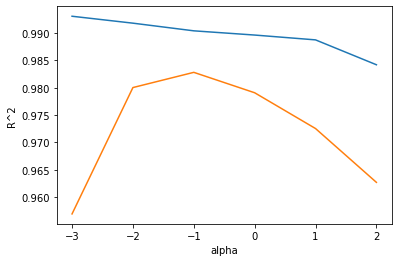

In [29]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

적절한 alpha값은 -1 , 즉 (10)^-1 값인 0.1이다. <br>
alpha값을 0.1로 하여 최종 모델을 훈련해 보겠다.

In [30]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


이 모델은 훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있다.

이번에는 라쏘 모델을 훈련해 보자.

### 라쏘 모델

라쏘 모델을 훈련하는 것은 릿지 모델과 매우 유사하다. Ridge 클래스를 Lasso 클래스로 바꾸는 것이 전부이다.

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [33]:
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))


0.989789897208096


라쏘도 과대적합을 잘 억제한 결과를 보여 준다. 테스트 세트의 점수도 확인해 보자.

In [34]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


테스트 세트의 점수도 릿지만큼 좋다. 라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할 수 있다.

여기에서도 앞에서와 같이 alpha 값을 바꾸어 가며 훈련 세트와 테스트 세트에 대한 점수를 계산하겠다.

In [40]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))


C:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\com\anaconda3\envs\vscode\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


convengenceWarning : 지정한 반복 횟수가 부족할 때 뜬다. 이 문제에서는 큰 영향을 미치지 않는다.

그 다음 train_score, test_score을 그래프에 그려 보자.

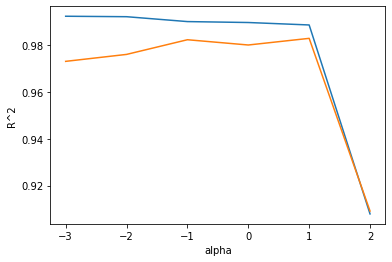

In [41]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

alpha값이 1 , 즉 10^1 값인 10에서 가장 최적이다. <br>
alpha 값을 10으로 설정해 최종 점수를 확인해 보자.

In [42]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


앞에서 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다고 했었다. <br>
라쏘 모델의 계수는 coef_ 속성에 지정되어 있다. 이 중에 0인 것을 헤아려 보자.

In [43]:
print(np.sum(lasso.coef_ == 0))

40


40개나 0이 되었다. 55개의 특성을 입력하였지만 사용한 특성의개수는 0이 되었다. <br>
이러한 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로 사용할 수도 있다.